<a href="https://colab.research.google.com/github/RautRitesh/Food-vision-101/blob/main/food_all_classes_with_confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

In [ ]:
zep_ref=zipfile.ZipFile("/content/drive/MyDrive/food_all_classes.zip")
zep_ref.extractall()
zep_ref.close()

In [ ]:
import os
import random
import numpy as  np
import pandas as pd
import tensorflow as tf
import sklearn
import mlxtend
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Now simply seeing the number of images in our training and testing data folder

In [ ]:
import pathlib

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories in {len(filenames)} images in '{dirpath}'")

There are 2 directories in 0 images in '/content/10_food_classes_all_data'
There are 10 directories in 0 images in '/content/10_food_classes_all_data/test'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/ice_cream'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/chicken_wings'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/sushi'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/hamburger'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/chicken_curry'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/fried_rice'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/steak'
There are 0 directories in 250 images in '/content/10_food_classes_all_data/test/pizza'
There are 0 di

In [ ]:
import random

## Now seeing the number of classes in our datasets

In [ ]:
dir_path=pathlib.Path("/content/10_food_classes_all_data/train")
class_names=np.array(sorted([item.name for item in dir_path.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## Now seeing the random image to see the random image and to find  out the pixels

In [ ]:
def show_images(target_dir, target_class):
  target_folder=target_dir + target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(f"{target_class}")
  plt.axis(False)
  print(f"Image shape:{img.shape}")
  return img

Image shape:(512, 512, 3)


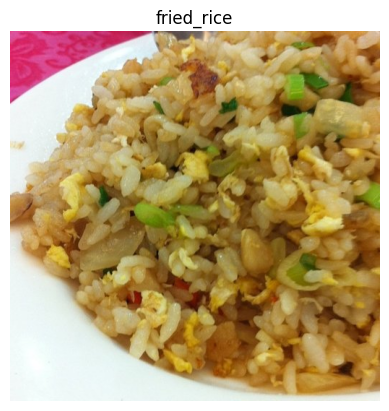

In [ ]:
img = show_images(target_dir="/content/10_food_classes_all_data/train/", target_class=random.choice(class_names))

## Woah!!! now lets preprocess our data so that it will be feed into the model

In [ ]:
train_dir="/content/10_food_classes_all_data/train"
test_dir="/content/10_food_classes_all_data/test"

In [ ]:
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                label_mode="categorical",
                                                                image_size=(224,224),
                                                                batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              label_mode="categorical",
                                                              image_size=(224,224),
                                                              batch_size=32,
                                                              shuffle=False)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Now using efficientnet model along with the data_augmentation layer for data regularization and proper training of the model

In [ ]:
base_model=tf.keras.applications.EfficientNetB4(include_top=False)
base_model.trainable=False

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2)
])

In [ ]:
input=tf.keras.layers.Input(shape=(224,224,3))
x=data_augmentation(input)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
output=tf.keras.layers.Dense(10,activation="softmax")(x)
model=tf.keras.Model(input,output)


In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
checkpoint_path="checkpoint.weights.h5"

In [ ]:
modelcheckpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                            save_weights_only=True,
                                                            save_best_only=True)

In [ ]:
history=model.fit(train_data,epochs=5,validation_data=test_data,callbacks=[modelcheckpoint_callback])

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 322ms/step - accuracy: 0.8164 - loss: 0.5558 - val_accuracy: 0.8824 - val_loss: 0.3649
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 73s 310ms/step - accuracy: 0.8332 - loss: 0.5207 - val_accuracy: 0.8720 - val_loss: 0.3868
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 276ms/step - accuracy: 0.8302 - loss: 0.5263 - val_accuracy: 0.8752 - val_loss: 0.3737
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 308ms/step - accuracy: 0.8372 - loss: 0.5186 - val_accuracy: 0.8748 - val_loss: 0.3770
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 306ms/step - accuracy: 0.8303 - loss: 0.5228 - val_accuracy: 0.8804 - val_loss: 0.3705


## Now checking the model predictions on the random data using the function

In [ ]:
def load_and_prepare(filename,image_size=224):
  img=tf.io.read_file(filename)
  img=tf.io.decode_image(img,channels=3)
  img=tf.image.resize(img,size=[image_size,image_size])
  return img


In [ ]:
def pred_and_show(model,filename,class_name=class_names):
  img=load_and_prepare(filename)
  pred_probs=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_name[int(tf.argmax(pred_probs,axis=1))]
  plt.imshow(img/255)
  plt.title(f"{pred_class}")
  plt.axis(False)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


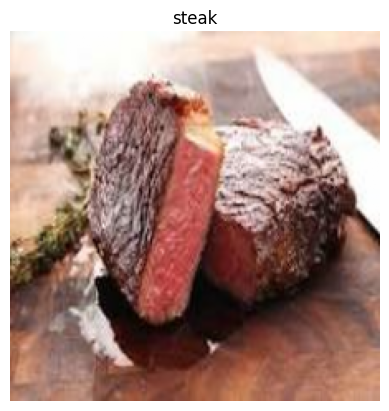

In [ ]:
pred_and_show(model=model,filename="/content/steak.jpg")

## Woah !! out of 10 models 8 are correct so now lets fine tune it

In [ ]:
model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Sequential name=sequential, built=True>,
 <Functional name=efficientnetb4, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>,
 <Dense name=dense, built=True>]

In [ ]:
for i,layer in enumerate( model.layers[2].layers):
  print(i,layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_redu

## Now lets convert last 10 layers of basemodel to "Trainable"  by at first making all layers trainable and then  making  all layers expect last 10 layers trainable and then compiling the model and fiting it for more 5 epochs with learning_rate=0.00001

In [ ]:
base_model.trainable=True

In [ ]:
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
for  i,layer in enumerate(base_model.layers):
  print(i,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block1b_dwconv False
19 block1b_bn False
20 block1b_activation False
21 block1b_se_squeeze False
22 block1b_se_reshape False
23 block1b_se_reduce False
24 block1b_se_expand False
25 block1b_se_excite False
26 block1b_project_conv False
27 block1b_project_bn False
28 block1b_drop False
29 block1b_add False
30 block2a_expand_conv False
31 block2a_expand_bn False
32 block2a_expand_activation False
33 block2a_dwconv_pad False
34 block2a_dwconv False
35 block2a_bn False
36 block2a_activation False
37 block2a_se_squeeze False
38 block2a_se_reshape False
39 block2a_se_redu

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [ ]:
model.fit(train_data,epochs=10,validation_data=test_data,initial_epoch=history.epoch[-1])

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 346ms/step - accuracy: 0.8054 - loss: 0.5884 - val_accuracy: 0.8748 - val_loss: 0.3763
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 75s 318ms/step - accuracy: 0.8294 - loss: 0.5143 - val_accuracy: 0.8780 - val_loss: 0.3649
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 319ms/step - accuracy: 0.8453 - loss: 0.4638 - val_accuracy: 0.8920 - val_loss: 0.3413
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 326ms/step - accuracy: 0.8553 - loss: 0.4292 - val_accuracy: 0.8916 - val_loss: 0.3348
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 285ms/step - accuracy: 0.8721 - loss: 0.3899 - val_accuracy: 0.8860 - val_loss: 0.3398
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 89s 315ms/step - accuracy: 0.8756 - loss: 0.3810 - val_accuracy: 0.8812 - val_loss: 0.3400


## Now seeing  how model works for the previous custom images will it beat 8/10 accuracy for custom images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


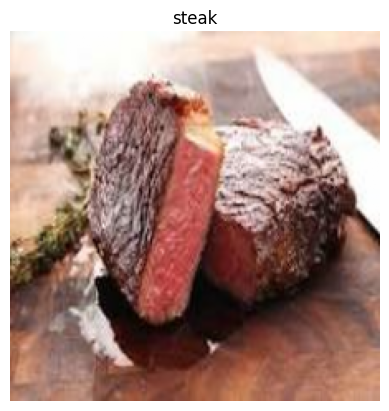

In [ ]:
pred_and_show(model=model,filename="/content/steak.jpg")

## Still the same prediction with 80% accuracy

## Now evaluating the model using confusion_matrix and classifiacation_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_preds=model.predict(test_data,verbose=1)

79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step


In [ ]:
y_pred=y_preds.argmax(axis=1)

## Now also finding out the actual 2500 labels

In [ ]:
y_labels=[]

In [ ]:
for images,lables in test_data.unbatch():
  y_labels.append(lables.numpy().argmax())

In [ ]:
cm = confusion_matrix(y_true=y_labels,y_pred=y_pred)

In [ ]:
print(cm)

[[204   8   5   5   3   1   3  16   4   1]
 [  6 227   0   3   1   0   0   1  12   0]
 [ 39   0 193   5   0   3   1   2   5   2]
 [ 11   0   5 185   7   0   1   2  37   2]
 [  0   3   0   2 233   2   0   0   8   2]
 [  1   1   0   0   1 240   1   1   3   2]
 [  2   0   0   0   1   0 245   2   0   0]
 [  9   0   1   3   0   2   0 234   1   0]
 [  3   2   1  11   3   0   1   3 225   1]
 [  7   0   1   7   4   3   2   1   8 217]]


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

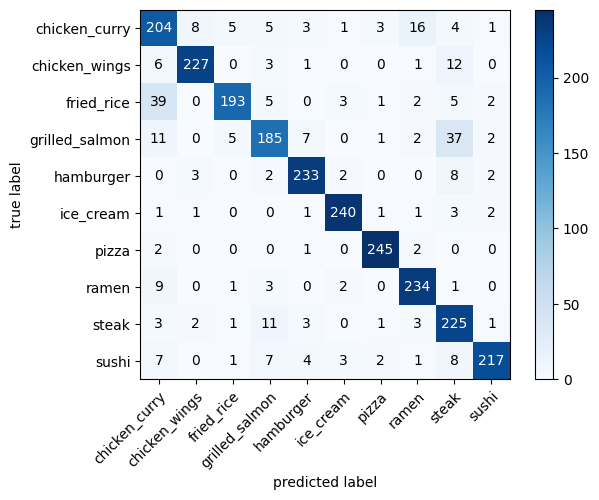

In [ ]:
plot_confusion_matrix(cm,colorbar=True,class_names=class_names)

## UMM our model has some issue hre as it predicts different result for the different one

## Lets see the box plot

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report_dict=classification_report(y_true=y_labels,y_pred=y_pred,output_dict=True)

In [ ]:
class_f1_scores={}
print(classification_report_dict)

{'0': {'precision': 0.723404255319149, 'recall': 0.816, 'f1-score': 0.7669172932330827, 'support': 250.0}, '1': {'precision': 0.941908713692946, 'recall': 0.908, 'f1-score': 0.924643584521385, 'support': 250.0}, '2': {'precision': 0.9368932038834952, 'recall': 0.772, 'f1-score': 0.8464912280701754, 'support': 250.0}, '3': {'precision': 0.8371040723981901, 'recall': 0.74, 'f1-score': 0.7855626326963907, 'support': 250.0}, '4': {'precision': 0.9209486166007905, 'recall': 0.932, 'f1-score': 0.9264413518886679, 'support': 250.0}, '5': {'precision': 0.9561752988047809, 'recall': 0.96, 'f1-score': 0.9580838323353293, 'support': 250.0}, '6': {'precision': 0.9645669291338582, 'recall': 0.98, 'f1-score': 0.9722222222222222, 'support': 250.0}, '7': {'precision': 0.8931297709923665, 'recall': 0.936, 'f1-score': 0.9140625, 'support': 250.0}, '8': {'precision': 0.7425742574257426, 'recall': 0.9, 'f1-score': 0.8137432188065099, 'support': 250.0}, '9': {'precision': 0.9559471365638766, 'recall': 0.86

In [ ]:
for k,v in classification_report_dict.items():
  if k=="accuracy":
    break
  else:
    class_f1_scores[class_names[int(k)]]=v["f1-score"]

In [ ]:
f1_score=pd.DataFrame({"class_names":list(class_f1_scores.keys()),
                       "f1_score":list(class_f1_scores.values())}).sort_values("f1_score",ascending=False)

Text(0.5, 1.0, 'f1_score')

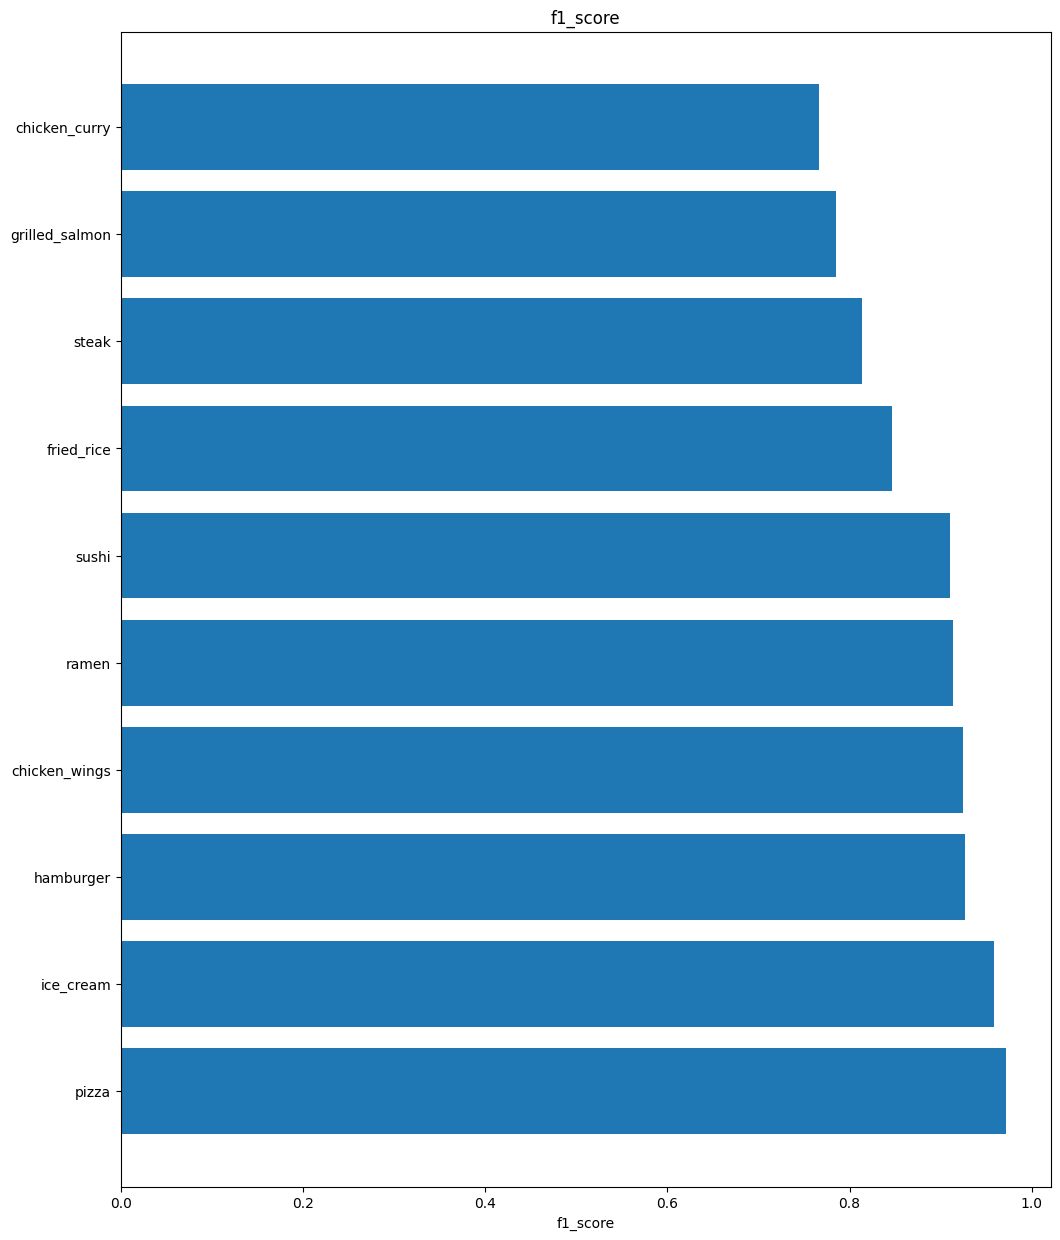

In [ ]:
fig,ax=plt.subplots(figsize=(12,15))
scores=ax.barh(range(len(f1_score)),f1_score["f1_score"].values)
ax.set_yticks(range(len(f1_score)))
ax.set_yticklabels(f1_score["class_names"])
ax.set_xlabel("f1_score")
ax.set_title("f1_score")


## Hence we can clearly see that the pizza has got the highest output prediction correct and can be considered good, but for steak and chicken _curry more kinds of data are required